### PLOT 

In [ ]:
#set your path
wt = np.loadtxt('/Volumes/2KSPAT/Kumar/EGFR_WT_mean_hbond.txt',delimiter=" ") 
l747p = np.loadtxt('/Volumes/2KSPAT/Kumar/EGFR_L747P_mean_hbond.txt',delimiter=" ")
del746_750 = np.loadtxt('/Volumes/2KSPAT/Kumar/EGFR_del746_750_mean_hbond.txt',delimiter=" ")
del747_753_insS = np.loadtxt('/Volumes/2KSPAT/Kumar/EGFR_del747_753_insS_mean_hbond.txt',delimiter=" ")
del747_750_insP = np.loadtxt('/Volumes/2KSPAT/Kumar/EGFR_del747_750_insP_mean_hbond.txt',delimiter=" ")

In [ ]:
wt_s = wt[np.argsort(wt[:, 0])]
l747p_s = l747p[np.argsort(l747p[:, 0])]
del746_750_s = del746_750[np.argsort(del746_750[:, 0])]
del747_753_insS_s = del747_753_insS[np.argsort(del747_753_insS[:, 0])]
del747_750_insP_s = del747_750_insP[np.argsort(del747_750_insP[:, 0])]

In [ ]:
del747_753_insS_s

In [ ]:
x = list(range(700,1010,10))
#labels = ['Geeks1', 'Geeks2', 'Geeks3', 'Geeks4']
j = 0
labels = []
for i in range(0,len(x)):
    t = str(x[i])
    
    if j % 5==0:
        labels.append(t)
    else:
        labels.append(' ')
    j = j + 1
labels


In [ ]:
plt.figure(figsize=(20,4))
plt.scatter(del746_750_s[:,0], del746_750_s[:,1],facecolor='red',marker="o",s=80, label='del746_750')
plt.scatter(del747_753_insS_s[:,0], del747_753_insS_s[:,1],facecolor='orange',marker="^",s=80,label='del_747_753>S')
plt.scatter(l747p_s[:,0], l747p_s[:,1],facecolor='cyan',marker="v",s=80, label='L747P')
plt.scatter(del747_750_insP_s[:,0], del747_750_insP_s[:,1],facecolor='blue',marker="s",s=80,label='del_747_750>P')
plt.plot(wt_s[:,0], wt_s[:,1],'--o',color='gray', markerfacecolor='gray')
plt.scatter(wt_s[:,0], wt_s[:,1],facecolor='gray',s=80, label='WT')



plt.xlabel('Residue Number',fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)


plt.xticks(x, labels,fontsize=18)

plt.ylabel('H-bond occupancy',fontsize=18)
#plt.title('EGFR',fontsize=18)
plt.legend(loc="upper right",prop=dict(weight='bold'))
plt.rcParams['axes.linewidth']=3   

plt.savefig('/Volumes/2KSPAT/Kumar/1_EGFR_H_bond_occupancy.png', bbox_inches = 'tight', dpi = 300)
plt.show()

### Mutual Information plot

In [ ]:
from pyitlib import discrete_random_variable as drv
df = pd.read_excel('/Volumes/2KSPAT/Kumar/EGFR_del747_753_insS.xlsx')
#len(df['mean'])
df = pd.read_excel('/Volumes/2KSPAT/Kumar/EGFR_del747_753_insS.xlsx')

In [ ]:
df

In [ ]:
del747_753_insS_s


In [ ]:
len(del747_753_insS_s)

In [ ]:
n = 6
df.drop(df.tail(n).index,inplace=True)
df

In [ ]:
len(df['mean'])

In [ ]:
qw = [df['median residue number'], df['mean']]

qw = np.array(qw)


In [ ]:
rtr = np.transpose(qw)

In [ ]:
rtr

In [ ]:
rtro = rtr[np.argsort(rtr[:,0])]
rtro

In [ ]:
del747_753_insS_s

In [ ]:
wq = []

for i in range(0,len(rtro)):
    d_NHp = [del747_753_insS_s[i,0], del747_753_insS_s[i,1], rtro[i,1]]
    wq.append(d_NHp)
        
    

In [ ]:
wq

In [ ]:
np.savetxt('/Volumes/2KSPAT/Kumar/Hbond_exchange_WT.txt',wq)

In [ ]:

plt.scatter(del747_753_insS_s[:,1],rtro[:,1])
plt.xlabel('H bond occupancy',fontsize=18)
plt.ylabel('% Exchange',fontsize=18)
#plt.text(0.55, 85, 'del747_750>P', fontsize=20)
#plt.text(0.65, 60, 'MI=5.85', fontsize=20)
plt.axvline(0.5, 0,100, color='k', linestyle='dashed')
plt.axhline(50, 0,1, color='k', linestyle='dashed')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('/Volumes/2KSPAT/Kumar/del_747_753_insS_1_corr.png', bbox_inches = 'tight', dpi = 300)

In [ ]:
peptide = []
p = []
#wq = np.array(wq)
for i in range(0,len(wq)):
    if wq[i][1] >= 0.5 and wq[i][2] >= 50:
        
        peptide.append(wq[i])
    


In [ ]:
peptide

In [ ]:
peptide = np.array(peptide)

In [ ]:
peptide

In [ ]:
df_new = df.loc[df['median residue number'].isin(lst.tolist())]

In [ ]:
df_new

In [ ]:
lst = peptide[:,0]

In [ ]:
lst

In [ ]:
rs

In [ ]:
type(rs)

In [ ]:
for i in range(0,len(df_new)):
    print(rs.find(df_new['peptide'].tolist()[i]) + 695)
    print(rs.find(df_new['peptide'].tolist()[i]) + 695 + len(df_new['peptide'].tolist()[i]))
    print("\n")

In [ ]:
print(rs.find(df_new['peptide'].tolist()[0]) + 695 + len(df_new['peptide'].tolist()[0]))

In [ ]:
df_new

In [3]:
import numpy as np
import pandas as pd

In [4]:
def norm_mutual(df, f1,C1):
    f = df[f1].tolist()
    C = df[C1].tolist()
    NMI = (2 * mutual_inf(df,f1,C1)) / ( ent(f) + ent(C))
    return (NMI)

In [5]:
# Compute entropy
# H(X)
# X is 1 D list

def ent(X):
    X = np.array(X)
    probs = [np.mean(X==c) for c in set(X)]
    return entro(probs)

In [6]:
def entro(J):
    S = 0
    for i in range(0,len(J)):
        if J[i] != 0:
            S = S  + (J[i] * np.log2(J[i]))
    
    return (-S)

In [7]:
# Compute Joint Entropy between2 variables
# H(X,Y)

def joint_entr (df, col1, col2):
    
    JP = joint_probs(df, [col1], [col2])
    
    joint_prob_element_list = []
    
    for i in range(0,len(JP)):
        for j in range(0, len(JP.transpose())):
            joint_prob_element_list.append(JP.iloc[i,j])
            
    joint_entropy = entro(joint_prob_element_list)
    return (joint_entropy)
            

In [8]:
# Compute conditional entropy between 2 variables
# H(X|Y) = H(X,Y) - H(Y)

def cond_entr(df, col1,col2):
    a = np.asarray(df[col2]).tolist()
    
    return (joint_entr(df, col1, col2)- ent(a))

In [9]:
# compute mutual information between two variables
# MI(X;Y) = H(X) - H(X|Y)

def mutual_inf(df, col1, col2):
    
    a = np.asarray(df[col1]).tolist()
    
    return (ent(a) - cond_entr(df, col1, col2))

In [9]:
# JP = joint_probs(df, [col1], [col2])
# joint_prob_element_list = []
    
# for i in range(0,len(JP)):

#     for j in range(0, len(JP.transpose())):

#         joint_prob_element_list.append(JP.iloc[i,j])


In [ ]:
joint_prob_element_list

In [10]:
# Joint probs for only two variables

def joint_probs(DF, index, cols):
    all_cols = index + cols
    N = DF.shape[0]
    
    joint_counts = pd.pivot_table(DF[all_cols], index = index, columns = cols, aggfunc='size').replace(np.nan,0)
    
    joint_prob = np.round(joint_counts/N , 3)
    return joint_prob
    

In [11]:
# joint probs for three variables

def joint_entropy_three(df, f1,f2,C):
    
    prob_array = np.zeros((5,5,5)) # the number of quantiles for each variable
    
    joint_prob_three_element = []
    
    for i in range(0,prob_array.shape[0]):
        for j in range(0,prob_array.shape[1]):
            for k in range(0,prob_array.shape[2]):
                if ((df[f1] == i) & (df[f2] == j) & (df[C] == k)).any():
                    joint_prob_three_element.append(df[[f1, f2,C]].value_counts()[i,j,k]/ len(df))

                    
    return entro(joint_prob_three_element)
                    

## Mutual information and SHAP values

In [12]:
f = np.loadtxt('/Users/keshavpatil/Downloads/Hbond_exchange_del747_753_insS.txt')
g = np.loadtxt('/Users/keshavpatil/Downloads/SASA_exchange_del747_753_insS.txt')

In [13]:
cols = ['mean_residue', 'Hbond', 'exchange']
df = pd.DataFrame(data=f, columns = cols)
df

,mean_residue,Hbond,exchange
0,707.5,0.224540,64.044353
1,708.5,0.195130,58.207532
2,713.0,0.371665,60.606467
3,713.5,0.353577,72.162041
4,716.5,0.497758,69.708583
...,...,...,...
64,991.5,0.026435,87.574362
65,1001.0,0.828346,104.467212
66,1002.5,0.581222,103.411579
67,1003.0,0.528429,98.228944


In [14]:
cols = ['mean_residue', 'SASA', 'exchange']
df1 = pd.DataFrame(data=g, columns = cols)
df1

,mean_residue,SASA,exchange
0,707.5,0.013125,64.044353
1,708.5,0.014625,58.207532
2,713.0,0.022053,60.606467
3,713.5,0.021250,72.162041
4,716.5,0.016500,69.708583
...,...,...,...
64,991.5,0.010250,87.574362
65,1001.0,0.000286,104.467212
66,1002.5,0.000300,103.411579
67,1003.0,0.000273,98.228944


In [15]:
df1['SASA'] * 100

0     1.312500
1     1.462500
2     2.205263
3     2.125000
4     1.650000
        ...   
64    1.025000
65    0.028571
66    0.030000
67    0.027273
68    0.016667
Name: SASA, Length: 69, dtype: float64

In [16]:
df = df.join(df1['SASA']*100)

In [17]:
df

,mean_residue,Hbond,exchange,SASA
0,707.5,0.224540,64.044353,1.312500
1,708.5,0.195130,58.207532,1.462500
2,713.0,0.371665,60.606467,2.205263
3,713.5,0.353577,72.162041,2.125000
4,716.5,0.497758,69.708583,1.650000
...,...,...,...,...
64,991.5,0.026435,87.574362,1.025000
65,1001.0,0.828346,104.467212,0.028571
66,1002.5,0.581222,103.411579,0.030000
67,1003.0,0.528429,98.228944,0.027273


In [130]:
df_wt 

In [136]:
df_l747p 

In [146]:
df_del747_750_insP  

In [152]:
df_del746_750 

In [158]:
df_del747_753_insS 

In [159]:
df_del747_753_insS 

,mean_residue,Hbond,exchange,SASA
0,707.5,0.224540,64.044353,1.312500
1,708.5,0.195130,58.207532,1.462500
2,713.0,0.371665,60.606467,2.205263
3,713.5,0.353577,72.162041,2.125000
4,716.5,0.497758,69.708583,1.650000
...,...,...,...,...
64,991.5,0.026435,87.574362,1.025000
65,1001.0,0.828346,104.467212,0.028571
66,1002.5,0.581222,103.411579,0.030000
67,1003.0,0.528429,98.228944,0.027273


In [161]:

frames = [df_wt, df_l747p, df_del747_750_insP, df_del746_750, df_del747_753_insS]
result = pd.concat(frames)
result

,mean_residue,Hbond,exchange,SASA
0,708.5,0.187438,29.444057,1.275000
1,713.0,0.325807,44.194744,1.947368
2,717.5,0.391673,64.645086,2.408333
3,718.0,0.426644,66.782088,2.081818
4,720.5,0.469411,50.591158,1.622222
...,...,...,...,...
64,991.5,0.026435,87.574362,1.025000
65,1001.0,0.828346,104.467212,0.028571
66,1002.5,0.581222,103.411579,0.030000
67,1003.0,0.528429,98.228944,0.027273


In [19]:
df.drop(df.tail(1).index,inplace=True)
df

,mean_residue,Hbond,exchange,SASA
0,707.5,0.224540,64.044353,1.312500
1,708.5,0.195130,58.207532,1.462500
2,713.0,0.371665,60.606467,2.205263
3,713.5,0.353577,72.162041,2.125000
4,716.5,0.497758,69.708583,1.650000
...,...,...,...,...
63,988.0,0.269539,88.695572,0.715789
64,991.5,0.026435,87.574362,1.025000
65,1001.0,0.828346,104.467212,0.028571
66,1002.5,0.581222,103.411579,0.030000


In [20]:
df = df.apply(lambda s:pd.qcut(s, q=10, labels =False))

In [21]:
df

,mean_residue,Hbond,exchange,SASA
0,0,2,6,7
1,0,2,4,8
2,0,5,5,8
3,0,5,7,8
4,0,7,7,8
...,...,...,...,...
63,9,3,9,4
64,9,0,9,7
65,9,9,9,0
66,9,8,9,0


In [103]:
df.columns.tolist()

['mean_residue', 'Hbond', 'exchange', 'SASA']

In [22]:
ent(df['exchange'])

3.3193536406050494

In [28]:
col1 = 'Hbond'
col2 = 'exchange'
col3 = 'SASA'
mutual_inf(df, col1, col2)

1.3437806414875455

In [30]:
mutual_inf(df, col2, col3)

1.1195703427446326

In [105]:
ent(df['Hbond'])


3.3193536406050494

In [106]:
ent(df['exchange'])


3.3193536406050494

## Normalized Mutual Information

In [107]:
norm_mutual(df,col1,col2)

0.40483202062272644

## Joint Mutual Information

In [23]:
# I(X,Y;Z) = H(Z) - H(Z|XY) = H(Z) - H(Z,X,Y) + H(X,Y)



C = 'exchange'
f1 = 'Hbond'
f2 = 'SASA'
H_Z = ent(df[C])
H_X_and_Y = joint_entr(df, f1,f2)

H_Z_and_X_and_Y = joint_entropy_three(df, f1, f2, C)


I_X_with_Y_with_Z = H_Z - H_Z_and_X_and_Y + H_X_and_Y





I_X_with_Y_with_Z



7.500529857320032

In [25]:
H_Z = ent(df[C])
H_Z 

3.3193536406050494

In [26]:
H_Z_and_X_and_Y 

1.1343678961213883

In [27]:
H_X_and_Y

5.315544112836371

In [167]:
result

,mean_residue,Hbond,exchange,SASA
0,708.5,0.187438,29.444057,1.275000
1,713.0,0.325807,44.194744,1.947368
2,717.5,0.391673,64.645086,2.408333
3,718.0,0.426644,66.782088,2.081818
4,720.5,0.469411,50.591158,1.622222
...,...,...,...,...
64,991.5,0.026435,87.574362,1.025000
65,1001.0,0.828346,104.467212,0.028571
66,1002.5,0.581222,103.411579,0.030000
67,1003.0,0.528429,98.228944,0.027273


In [172]:
result = result.dropna()

In [174]:
result

,mean_residue,Hbond,exchange,SASA
0,708.5,0.187438,29.444057,1.275000
1,713.0,0.325807,44.194744,1.947368
2,717.5,0.391673,64.645086,2.408333
3,718.0,0.426644,66.782088,2.081818
4,720.5,0.469411,50.591158,1.622222
...,...,...,...,...
64,991.5,0.026435,87.574362,1.025000
65,1001.0,0.828346,104.467212,0.028571
66,1002.5,0.581222,103.411579,0.030000
67,1003.0,0.528429,98.228944,0.027273


In [178]:
result.rename(columns = {'Hbond':'Hbond occupancy'}, inplace = True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [179]:
result

,mean_residue,Hbond occupancy,exchange,SASA
0,708.5,0.187438,29.444057,1.275000
1,713.0,0.325807,44.194744,1.947368
2,717.5,0.391673,64.645086,2.408333
3,718.0,0.426644,66.782088,2.081818
4,720.5,0.469411,50.591158,1.622222
...,...,...,...,...
64,991.5,0.026435,87.574362,1.025000
65,1001.0,0.828346,104.467212,0.028571
66,1002.5,0.581222,103.411579,0.030000
67,1003.0,0.528429,98.228944,0.027273


## SHAP Values 

In [180]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
#df = pd.read_csv('/Users/keshavpatil/Downloads/winequality-red.csv') # Load the data
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# The target variable is 'quality'.
Y = result['exchange']
X =  result[['Hbond occupancy', 'SASA']]
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# Build the model with the random forest regression algorithm:
model = DecisionTreeRegressor(max_depth=6, random_state=0)
model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

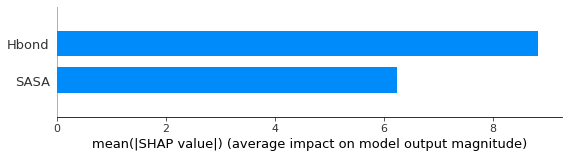

In [176]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

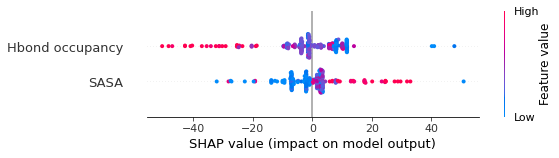

In [188]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train, show=False)
plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(10)
f.savefig("/Users/keshavpatil/Downloads/summary_plot1.png", bbox_inches='tight', dpi = 300)